In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:
#Get the current working directory
cwd = os.getcwd()
print(cwd)

c:\Documenten\ADS\PPM\Assignment2\Git\PPM


In [7]:
#read csv file
df = pd.read_csv('streamlit_app/data/spotify_tracks.csv', encoding="latin-1")
# print column names of df
print(df.columns)
tracklist_short = df.sample(frac=0.01, random_state=42)  # 1% van de data

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')


# Mood categorization

## Apply categorization and explore

In [9]:
# Function to categorize genres into 10 mood categories
def categorize_genre_mood(genre):
    categories = {
        "Energetic & Uplifting": [
            'club', 'power-pop', 'trance', 'drum-and-bass', 'progressive-house', 'techno', 
            'disco', 'hardstyle', 'reggaeton', 'salsa', 'dancehall', 'electronic', 
            'deep-house', 'house', 'dance', 'edm', 'dubstep', 'funk', 'groove', 'breakbeat', 
            'detroit-techno', 'chicago-house'
        ],
        "Joyful & Popular": [
            'pop', 'k-pop', 'j-pop', 'mandopop', 'cantopop', 'indie-pop', 'swedish', 'german', 
            'latino', 'happy', 'party', 'latin', 'samba', 'brazil', 'pop-film', 'j-idol', 
            'j-dance', 'show-tunes', 'comedy'
        ],
        "Hard & Intense": [
            'punk-rock', 'hardcore', 'black-metal', 'death-metal', 'heavy-metal', 'grindcore', 
            'metalcore', 'emo', 'industrial', 'metal', 'punk', 'hard-rock', 'goth', 'grunge', 
            'rock', 'alt-rock', 'blues', 'garage', 'rockabilly', 'honky-tonk'
        ],
        "Dark & Alternative": [
            'alternative', 'goth', 'trip-hop', 'psychedelic', 'j-rock', 'indie', 'minimal-techno', 
            'idm', 'industrial', 'black-metal', 'punk', 'emo', 'alt-rock', 'grunge', 'guitar'
        ],
        "Relaxing & Dreamy": [
            'chill', 'ambient', 'new-age', 'sleep', 'study', 'piano', 'acoustic', 'singer-songwriter', 
            'folk', 'songwriter', 'opera', 'classical', 'bluegrass', 'jazz'
        ],
        "Rhythmic & Danceable": [
            'afrobeat', 'groove', 'ska', 'soul', 'gospel', 'pagode', 'forro', 'sertanejo', 'brazil', 
            'latin', 'samba', 'tango'
        ],
        "Classical & Elegant": [
            'classical', 'opera', 'piano'
        ],
        "Timeless & Authentic": [
            'country', 'bluegrass', 'honky-tonk', 'rockabilly', 'rock-n-roll', 'tango', 'world-music', 
            'reggae', 'indian', 'turkish', 'iranian', 'flamenco', 'french', 'spanish', 'blues'
        ],
        "Kids & Family": [
            'disney', 'show-tunes', 'comedy', 'kids', 'pop-film', 'happy', 'children'
        ],
        "Experimental & Eclectic": [
            'anime', 'avant-garde', 'new-wave', 'world-music', 'alternative-electronic', 'fusion genres', 
            'j-idol', 'detroit-techno', 'experimental', 'indie', 'indie-rock', 'dub', 'idm', 'party'
        ]
    }
    # Check if the genre is in any of the categories
    for category, genres in categories.items():
        if genre in genres:
            return category
    return 'Other'  # For uncategorized genres



In [10]:
# Ensure 'track_genre' column exists and handle missing values
if 'track_genre' in tracklist_short.columns:
    tracklist_short['track_genre'] = tracklist_short['track_genre'].fillna('Other')
    tracklist_short['category_mood'] = tracklist_short['track_genre'].apply(categorize_genre_mood)
else:
    print("Column 'track_genre' does not exist in the DataFrame")

# Print de eerste 5 rijen van de DataFrame
print(tracklist_short.head())

        Unnamed: 0                track_id                     artists  \
113186      113186  6KwkVtXm8OUp2XffN5k7lY            Hillsong Worship   
42819        42819  2dp5I5MJ8bQQHDoFaNRFtX                Internal Rot   
59311        59311  5avw06usmFkFrPjX8NxC40  Zhoobin Askarieh;Ali Sasha   
91368        91368  75hT0hvlESnDJstem0JgyR                 Bryan Adams   
61000        61000  4bY2oZGA5Br3pTE1Jd1IfY                  Nogizaka46   

                             album_name             track_name  popularity  \
113186                    No Other Name          No Other Name          50   
42819                    Grieving Birth         Failed Organum          11   
59311              Noise A Noise 20.4-1  Save the Trees, Pt. 1           0   
91368   All I Want For Christmas Is You        Merry Christmas           0   
61000                ãã¬ãã¿ TypeD        æã®å¤§ãã          57   

        duration_ms  explicit  danceability  energy  ...  mode  speechiness  \
113186 

C:\Users\ilsebakker\AppData\Local\Temp\ipykernel_18392\654615676.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=category_count, x='track_count', y='category_mood', palette='tab10')


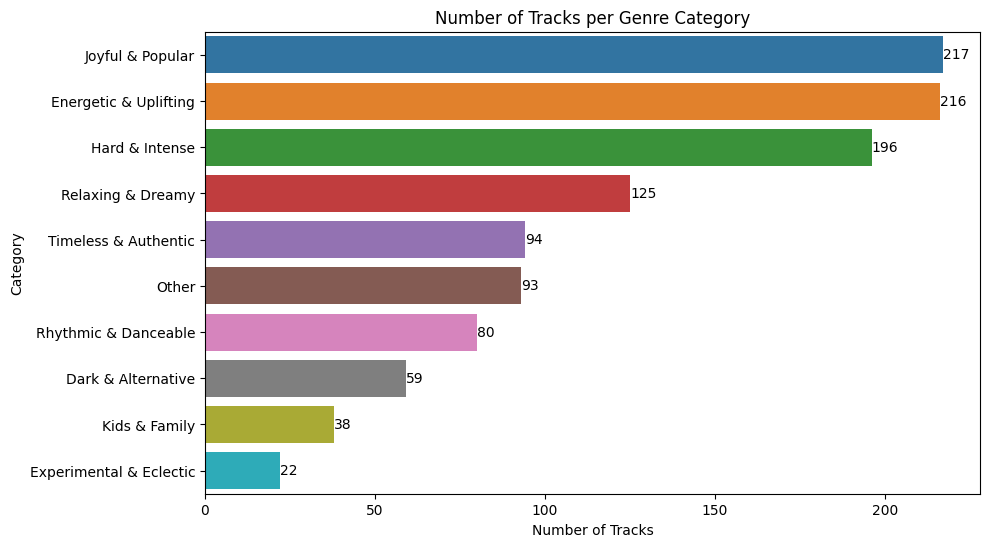

In [11]:
#Create a bar plot of the number of tracks per mood category
# Count the number of tracks per category
category_count = tracklist_short['category_mood'].value_counts().reset_index()
category_count.columns = ['category_mood', 'track_count']

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bar = sns.barplot(data=category_count, x='track_count', y='category_mood', palette='tab10')

# Annotate the bars
for i, row in category_count.iterrows():
    bar.text(row['track_count'], i, row['track_count'], ha='left', va='center')
    
plt.title('Number of Tracks per Genre Category')
plt.xlabel('Number of Tracks')
plt.ylabel('Category')
plt.show()

In [24]:
# Filter the dataframe for rows where category_mood is 'Other'
other_genres = tracklist_short[tracklist_short['category_mood'] == 'Other']['track_genre'].unique()

# Print the unique genres
print(other_genres)

['r-n-b' 'electro' 'sad' 'mpb' 'malay' 'psych-rock' 'british' 'hip-hop'
 'romance' 'synth-pop']


## Find feature importance

Note: you may need to restart the kernel to use updated packages.


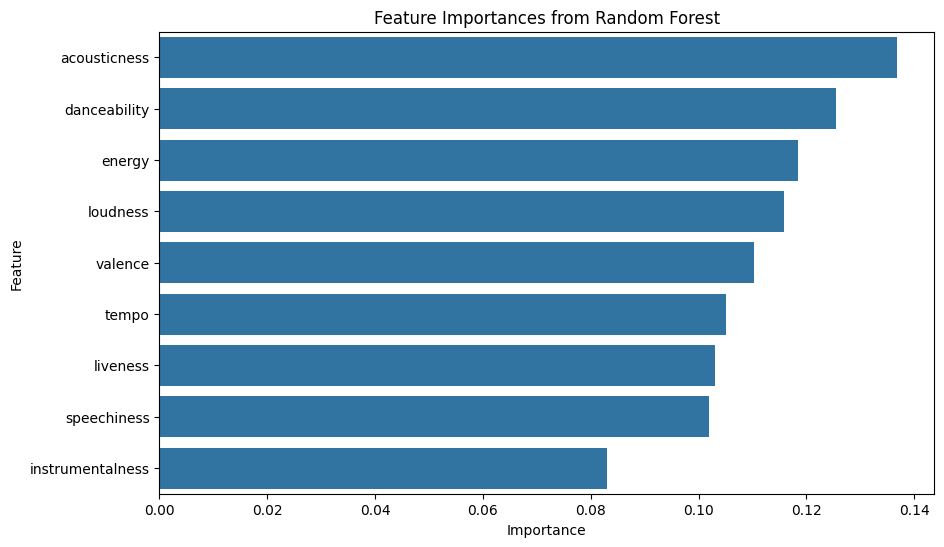

In [25]:
%pip install scikit-learn

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Prepare the data
# Select features and target
features = tracklist_short[['danceability', 'energy', 'valence', 'tempo', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']]
target = tracklist_short['category_mood']

# Encode the target labels
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importances_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances from Random Forest')
plt.show()

## Acousticness vs Danceability

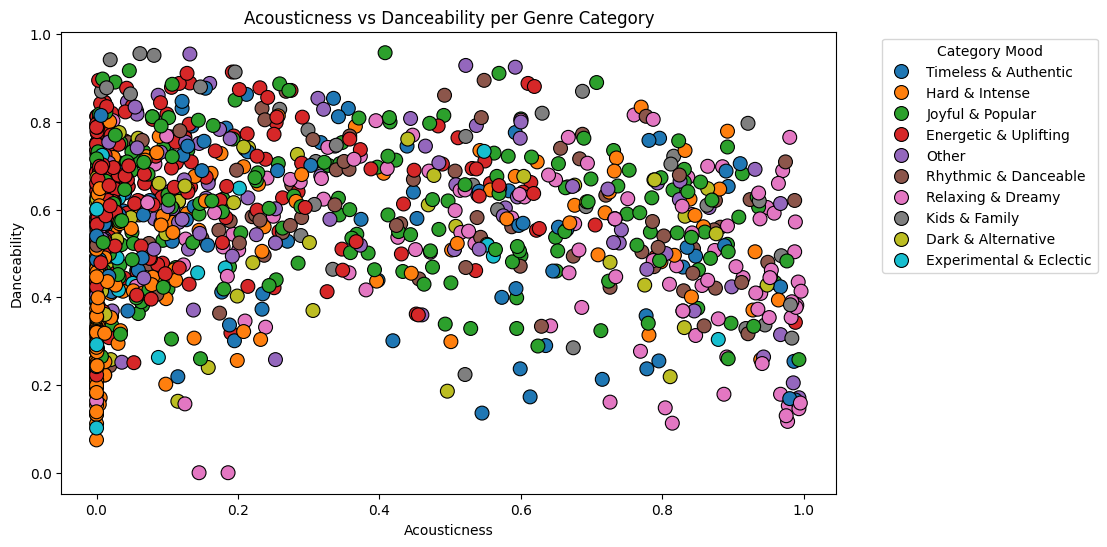

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tracklist_short, x='acousticness', y='danceability', hue='category_mood', palette='tab10', s=100, edgecolor='black')

# Add titles and labels
plt.title('Acousticness vs Danceability per Genre Category')
plt.xlabel('Acousticness')
plt.ylabel('Danceability')
plt.legend(title='Category Mood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Energy vs Danceability

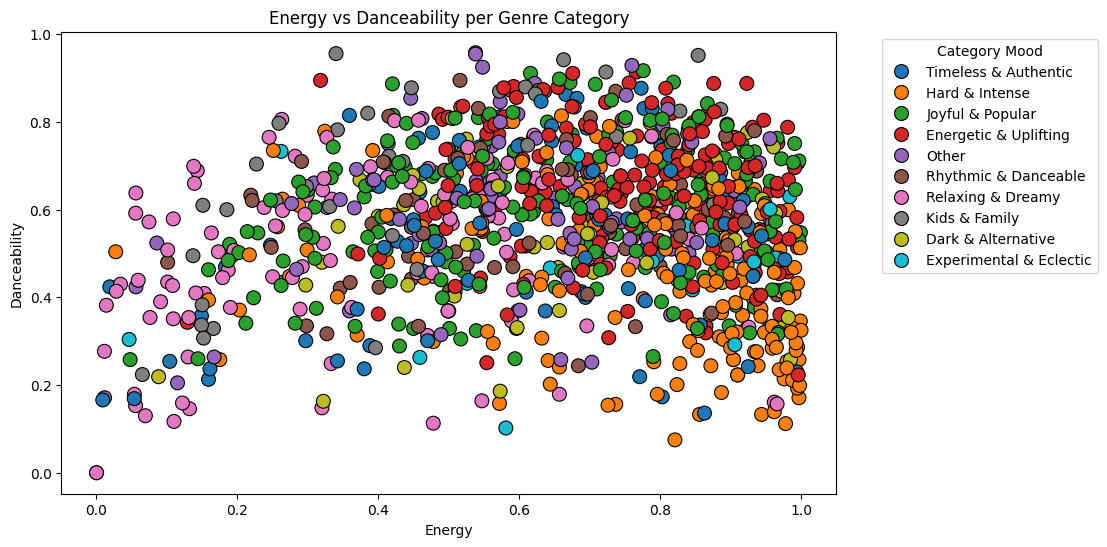

In [27]:
# Create the scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tracklist_short, x='energy', y='danceability', hue='category_mood', palette='tab10', s=100, edgecolor='black')

# Add titles and labels
plt.title('Energy vs Danceability per Genre Category')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.legend(title='Category Mood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

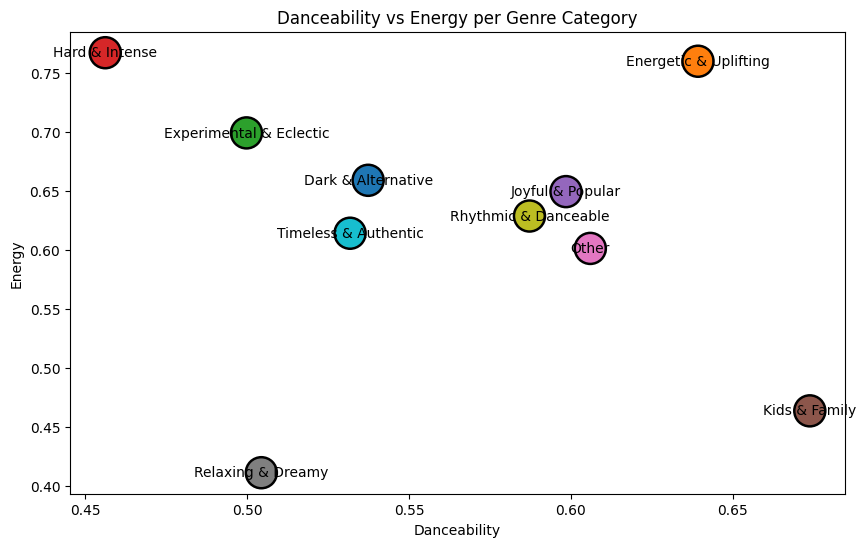

In [29]:
# Calculate the average values of danceability and energy per category
category_avg_dance_energy = tracklist_short.groupby('category_mood')[['danceability', 'energy']].mean().reset_index()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=category_avg_dance_energy, x='danceability', y='energy', hue='category_mood', palette='tab10', s=500, edgecolor='black', legend=False, ax=ax)

# Annotate the points
for i, row in category_avg_dance_energy.iterrows():
    ax.text(row['danceability'], row['energy'], row['category_mood'], ha='center', va='center')

plt.title('Danceability vs Energy per Genre Category')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.show()

### Facet plot

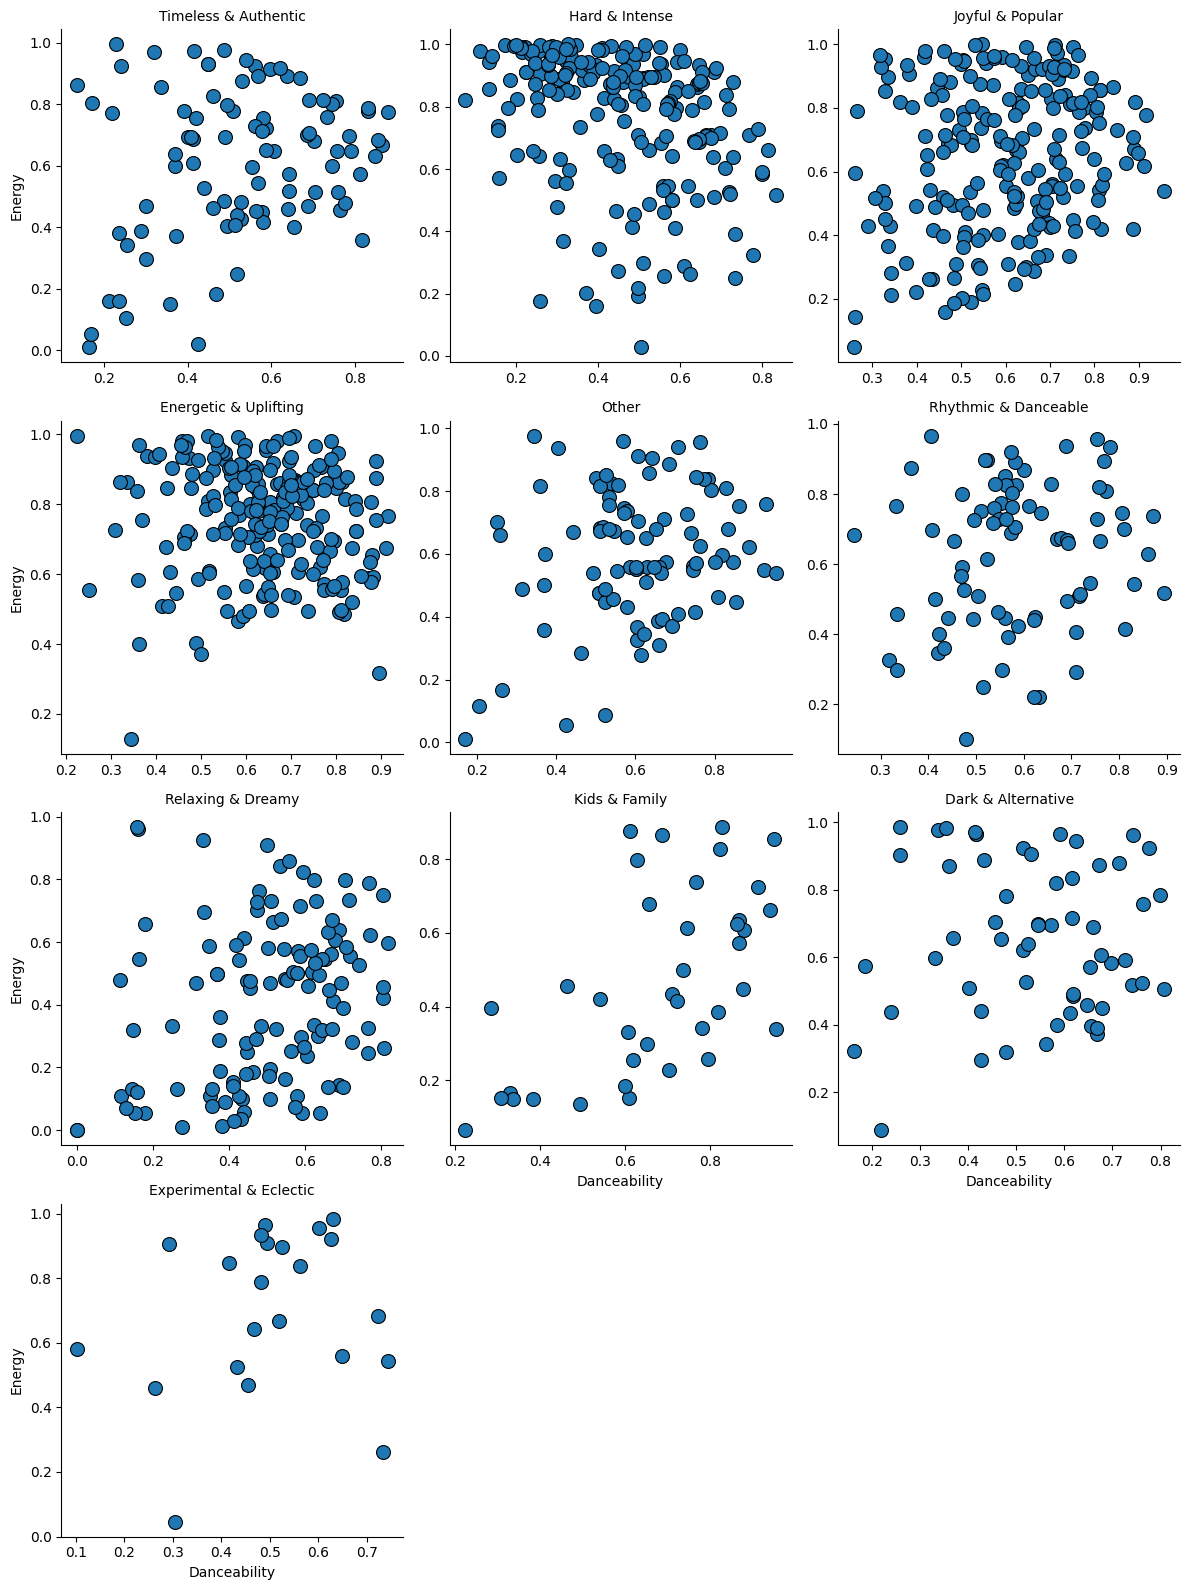

In [28]:
# Create facet plot of danceability vs energy for all categories
sns.set_palette('tab10')

# Create the facet plot
facet = sns.FacetGrid(tracklist_short, col='category_mood', col_wrap=3, height=4, sharex=False, sharey=False, palette='tab10')
facet.map(sns.scatterplot, 'danceability', 'energy', s=100, edgecolor='black')
facet.set_titles('{col_name}')
facet.set_xlabels('Danceability')
facet.set_ylabels('Energy')
plt.show()

## Valence vs Energy

### Full scatter

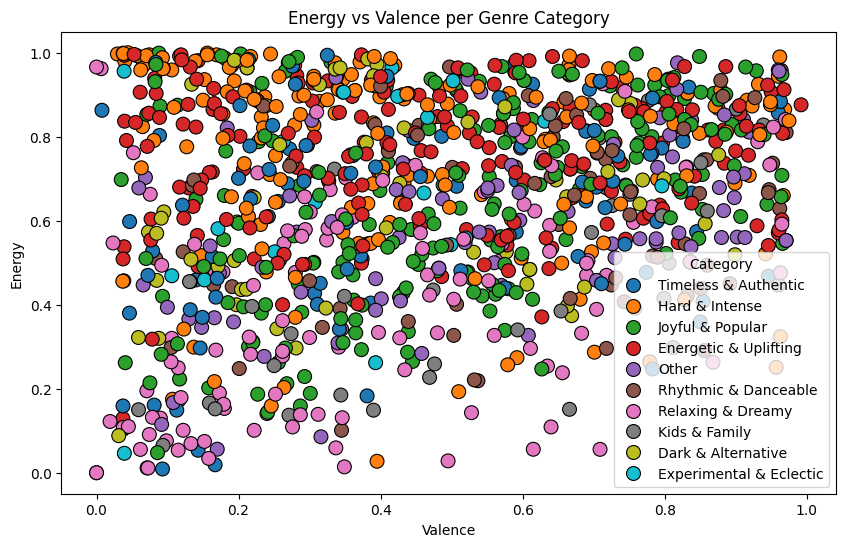

In [12]:
# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
scatter = sns.scatterplot(data=tracklist_short, x='valence', y='energy', hue='category_mood', palette='tab10', s=100, edgecolor='black')

# Make the legend interactive
legend = ax.legend(title="Category", frameon=True)
handles, labels = ax.get_legend_handles_labels()
for handle in handles:
    handle.set_picker(True)  # Make items clickable

# Function to toggle visibility
def on_pick(event):
    label = event.artist.get_text()
    for handle, collection in zip(handles, scatter.collections):
        if handle.get_label() == label:
            collection.set_visible(not collection.get_visible())
    plt.draw()

# Connect the pick event
fig.canvas.mpl_connect("pick_event", on_pick)

plt.title('Energy vs Valence per Genre Category')
plt.xlabel('Valence')
plt.ylabel('Energy')
plt.show()

### genre centroids

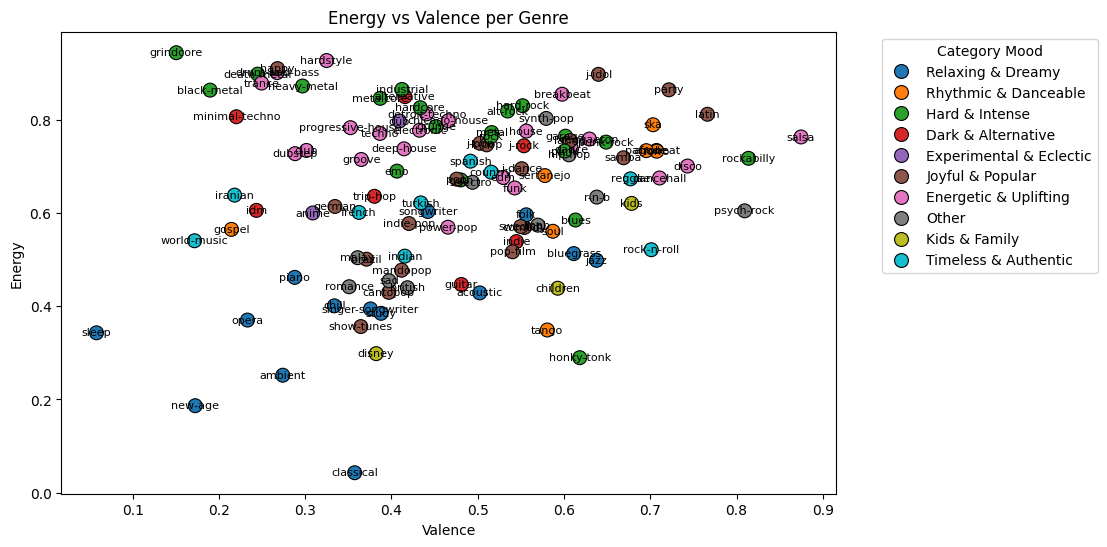

In [15]:
# Calculate the average values per genre
genre_avg = tracklist_short.groupby('track_genre')[['valence', 'energy']].mean().reset_index()

# Merge with category_mood
genre_avg = genre_avg.merge(tracklist_short[['track_genre', 'category_mood']].drop_duplicates(), on='track_genre')

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=genre_avg, x='valence', y='energy', hue='category_mood', palette='tab10', s=100, edgecolor='black', ax=ax)

# Annotate the points
for i, row in genre_avg.iterrows():
    ax.text(row['valence'], row['energy'], row['track_genre'], ha='center', va='center', fontsize=8)

plt.title('Energy vs Valence per Genre')
plt.xlabel('Valence')
plt.ylabel('Energy')
plt.legend(title='Category Mood', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Facet plots

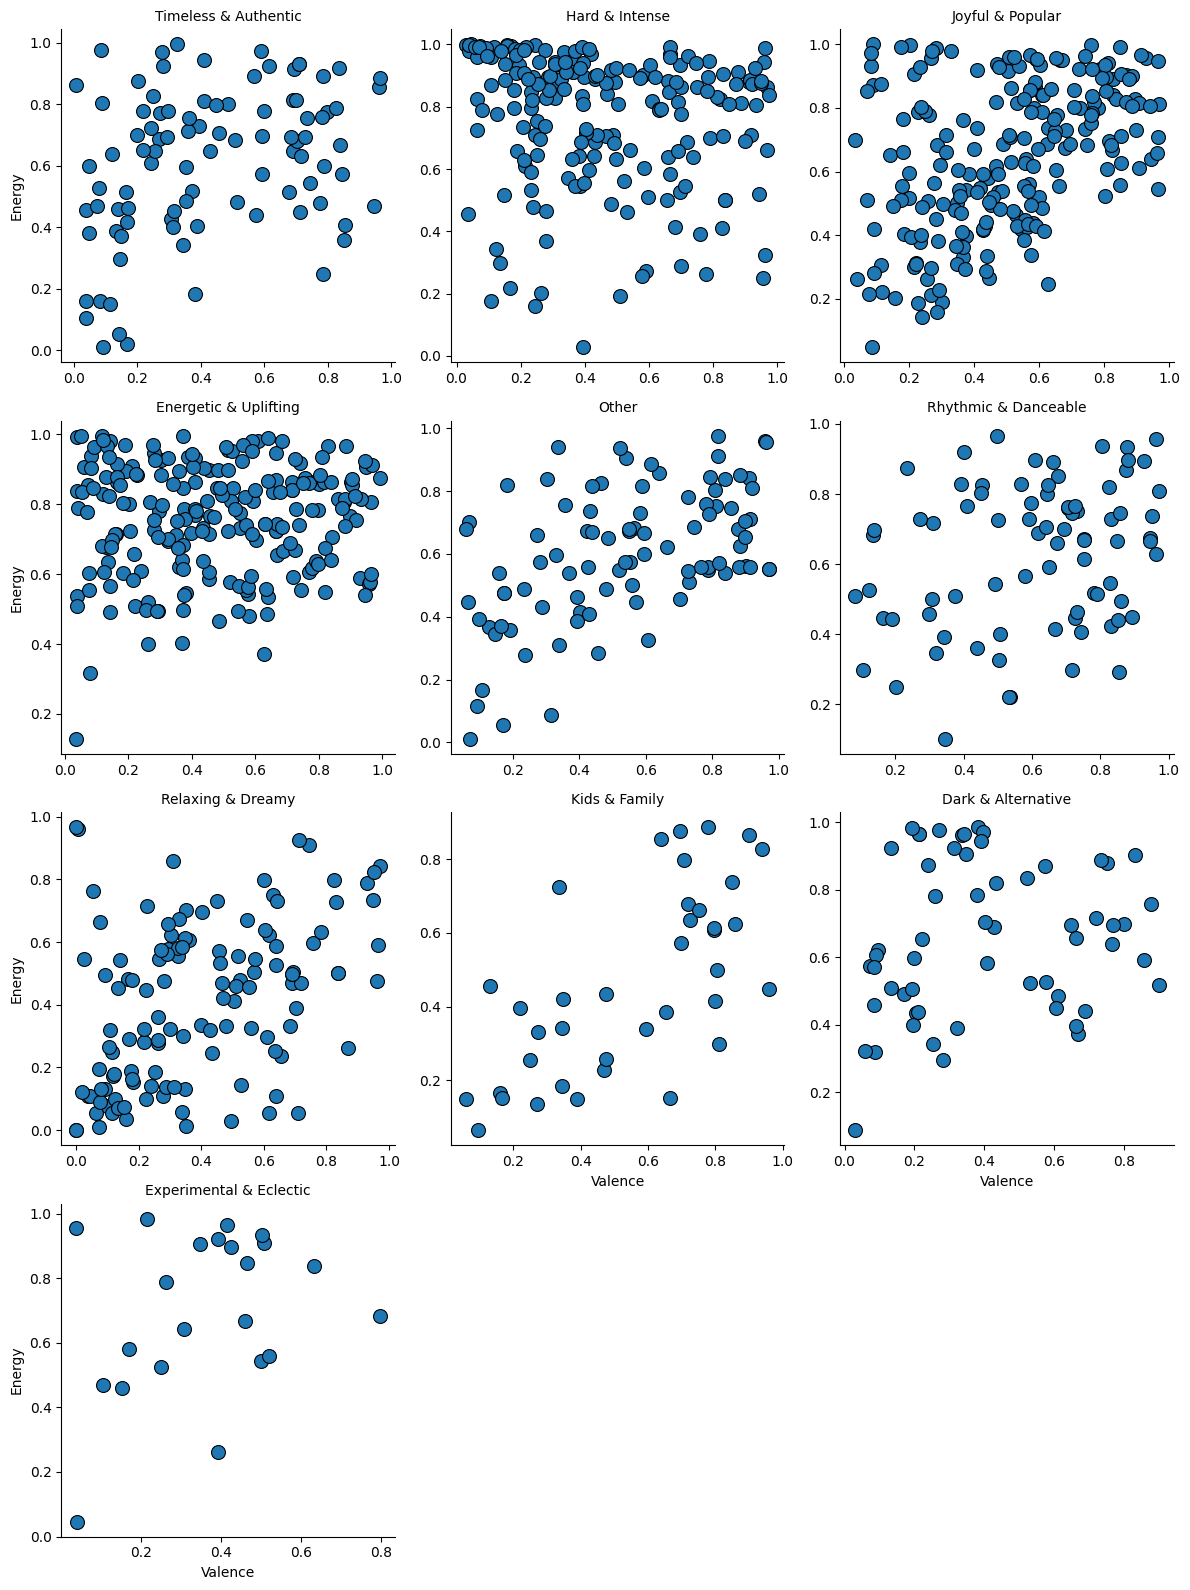

In [13]:
#Create facet plot of all categories
#Match colors with the previous plot
sns.set_palette('tab10')

# Create the facet plot
facet = sns.FacetGrid(tracklist_short, col='category_mood', col_wrap=3, height=4, sharex=False, sharey=False, palette='tab10')
facet.map(sns.scatterplot, 'valence', 'energy', s=100, edgecolor='black')
facet.set_titles('{col_name}')
facet.set_xlabels('Valence')
facet.set_ylabels('Energy')
plt.show()


### Category centroids

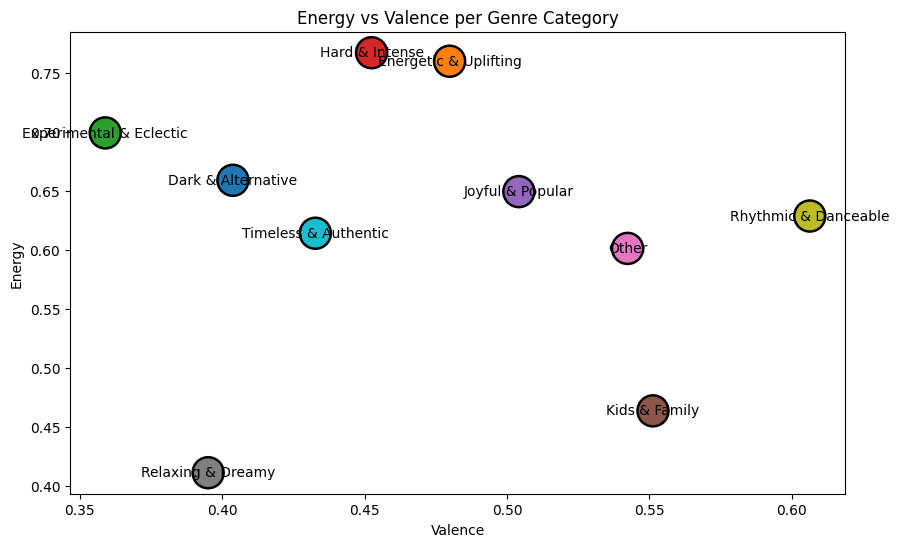

In [ ]:
#Find for each mood category the average Energy and Valence value and plot all those centroids in a scatter plot
# Calculate the average values per category
category_avg = tracklist_short.groupby('category_mood')[['valence', 'energy']].mean().reset_index()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
#scatter = sns.scatterplot(data=tracklist_short, x='valence', y='energy', hue='category_mood', palette='tab10', s=100, edgecolor='black')
sns.scatterplot(data=category_avg, x='valence', y='energy', hue='category_mood', palette='tab10', s=500, edgecolor='black', legend=False, ax=ax)

# Annotate the points
for i, row in category_avg.iterrows():
    ax.text(row['valence'], row['energy'], row['category_mood'], ha='center', va='center')
    
plt.title('Energy vs Valence per Genre Category')
plt.xlabel('Valence')
plt.ylabel('Energy')
plt.show()


## Danceability vs Valence

### Category Centroids

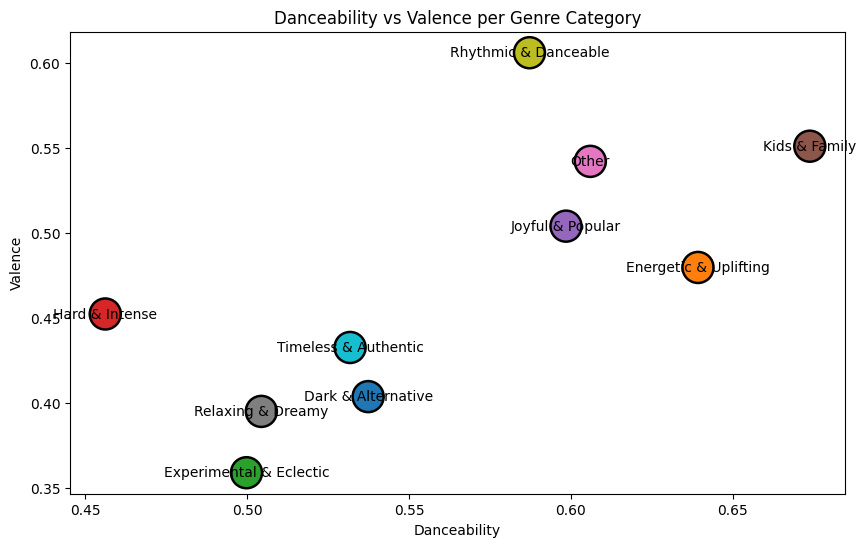

In [16]:
# Calculate the average values of danceability and valence per category
category_avg_dance_valence = tracklist_short.groupby('category_mood')[['danceability', 'valence']].mean().reset_index()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=category_avg_dance_valence, x='danceability', y='valence', hue='category_mood', palette='tab10', s=500, edgecolor='black', legend=False, ax=ax)

# Annotate the points
for i, row in category_avg_dance_valence.iterrows():
    ax.text(row['danceability'], row['valence'], row['category_mood'], ha='center', va='center')

plt.title('Danceability vs Valence per Genre Category')
plt.xlabel('Danceability')
plt.ylabel('Valence')
plt.show()

# Musical Categories

## Categorize

In [43]:
# Function to categorize genres into 10 mood categories
def categorize_genre_musical(genre):
    categories = {
        "Pop": ['ska', 'pop-film', 'power-pop', 'indie-pop', 'synth-pop', 'j-pop', 'dance', 'chill', 'pop', 'electro', 'disco', 'k-pop'],
        "Rock & Alternative": ['rock-n-roll', 'punk', 'alternative', 'punk-rock', 'indie', 'j-rock', 'hard-rock', 'rock', 'metalcore', 'grunge', 'alt-rock', 'psych-rock', 'garage'],
        "Electronic & Dance": ['dub', 'trance', 'electronic', 'hardstyle','edm', 'club', 'techno', 'house', 'deep-house', 'dancehall', 'progressive-house', 'minimal-techno', 'chicago-house', 'detroit-techno', 'breakbeat', 'drum-and-bass', 'trip-hop'],
        "Hip-Hop & R&B": ['hip-hop', 'r-n-b', 'dubstep', 'idm', 'j-dance'],
        "Latin": ['reggae','latin', 'salsa', 'reggaeton', 'afrobeat', 'brazil', 'mpb', 'sertanejo', 'forro', 'tango', 'spanish', 'latino'],
        "Jazz & Blues": ['groove', 'jazz', 'blues', 'soul', 'funk', 'gospel'],
        "Metal & Hard": ['emo', 'hardcore', 'black-metal', 'heavy-metal', 'death-metal', 'grindcore', 'goth', 'industrial', 'metal'],
        "Folk & Acoustic": ['guitar','folk', 'acoustic', 'singer-songwriter', 'country', 'bluegrass', 'honky-tonk', 'rockabilly'],
        "World & Traditional": [ 'indian', 'turkish', 'iranian', 'world-music', 'pagode', 'samba', 'forro', 'cantopop', 'mandopop', 'j-idol'],
        "Classical & Instrumental": ['classical', 'piano', 'opera', 'study', 'sleep',  'ambient', 'sad', 'romance'],
        "Thematic & Mood": ['disney', 'children', 'kids', 'comedy',  'happy', 'new-age', 'show-tunes'],
        "Experimental & Miscellaneous": ['anime', 'songwriter', 'party', 'british', 'french', 'german', 'swedish', 'malay']
    }
    # Check if the genre is in any of the categories
    for category, genres in categories.items():
        if genre in genres:
            return category
    return 'Other'  # For uncategorized genres

In [45]:
# Ensure 'track_genre' column exists and handle missing values
if 'track_genre' in tracklist_short.columns:
    tracklist_short['track_genre'] = tracklist_short['track_genre'].fillna('Other')
    tracklist_short['category_musical'] = tracklist_short['track_genre'].apply(categorize_genre_musical)
else:
    print("Column 'track_genre' does not exist in the DataFrame")

# Print de eerste 5 rijen van de DataFrame
print(tracklist_short.head())

        Unnamed: 0                track_id                     artists  \
113186      113186  6KwkVtXm8OUp2XffN5k7lY            Hillsong Worship   
42819        42819  2dp5I5MJ8bQQHDoFaNRFtX                Internal Rot   
59311        59311  5avw06usmFkFrPjX8NxC40  Zhoobin Askarieh;Ali Sasha   
91368        91368  75hT0hvlESnDJstem0JgyR                 Bryan Adams   
61000        61000  4bY2oZGA5Br3pTE1Jd1IfY                  Nogizaka46   

                             album_name             track_name  popularity  \
113186                    No Other Name          No Other Name          50   
42819                    Grieving Birth         Failed Organum          11   
59311              Noise A Noise 20.4-1  Save the Trees, Pt. 1           0   
91368   All I Want For Christmas Is You        Merry Christmas           0   
61000                ãã¬ãã¿ TypeD        æã®å¤§ãã          57   

        duration_ms  explicit  danceability  energy  ...  speechiness  \
113186       

C:\Users\ilsebakker\AppData\Local\Temp\ipykernel_18392\827627486.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=category_count, x='track_count', y='category_musical', palette='tab10')


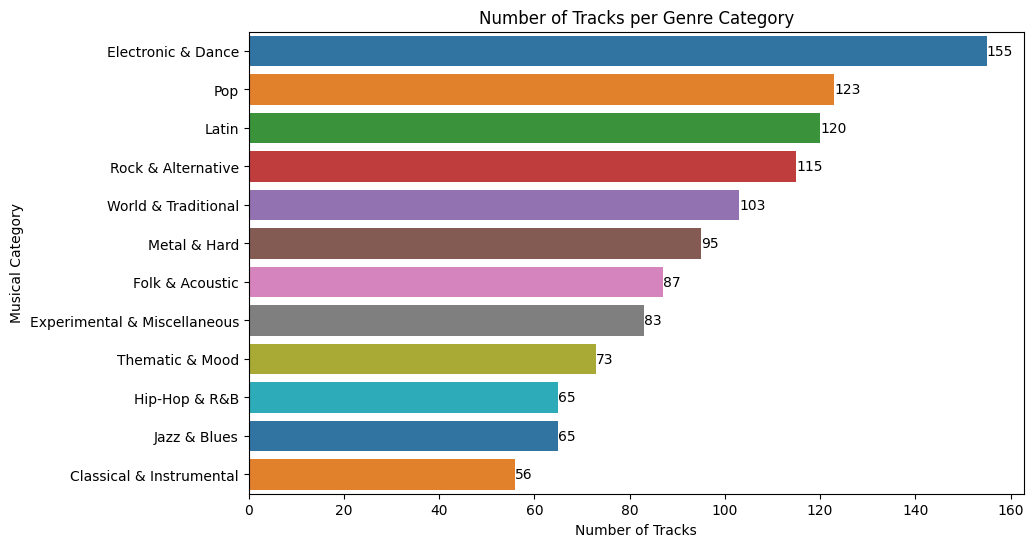

In [46]:
#Create a bar plot of the number of tracks per mood category
# Count the number of tracks per category
category_count = tracklist_short['category_musical'].value_counts().reset_index()
category_count.columns = ['category_musical', 'track_count']

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
bar = sns.barplot(data=category_count, x='track_count', y='category_musical', palette='tab10')

# Annotate the bars
for i, row in category_count.iterrows():
    bar.text(row['track_count'], i, row['track_count'], ha='left', va='center')
    
plt.title('Number of Tracks per Genre Category')
plt.xlabel('Number of Tracks')
plt.ylabel('Musical Category')
plt.show()  

## Find feature importance

Note: you may need to restart the kernel to use updated packages.


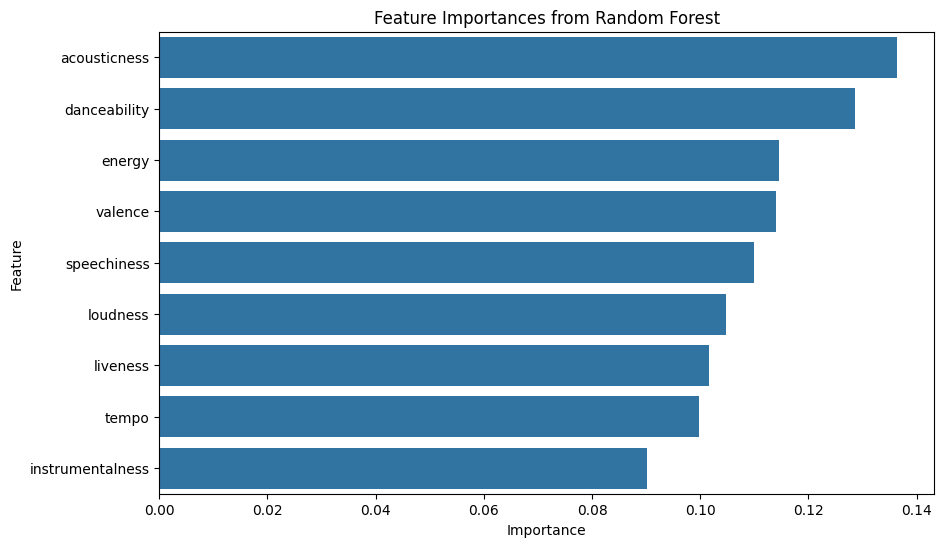

In [47]:
%pip install scikit-learn

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Prepare the data
# Select features and target
features = tracklist_short[['danceability', 'energy', 'valence', 'tempo', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']]
target = tracklist_short['category_musical']

# Encode the target labels
label_encoder = LabelEncoder()
target_encoded = label_encoder.fit_transform(target)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target_encoded, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importances_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances from Random Forest')
plt.show()

## danceability vs energy

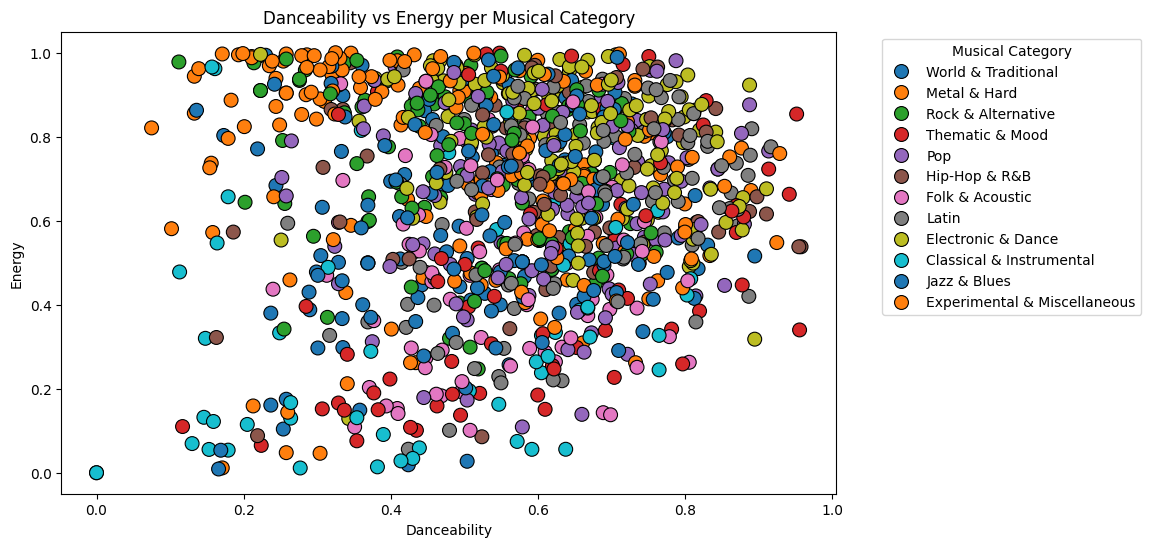

In [48]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tracklist_short, x='danceability', y='energy', hue='category_musical', palette='tab10', s=100, edgecolor='black')

# Add titles and labels
plt.title('Danceability vs Energy per Musical Category')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend(title='Musical Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [51]:
#see all column names of the dataframe
print(tracklist_short.columns)

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre', 'category_mood', 'category_musical'],
      dtype='object')


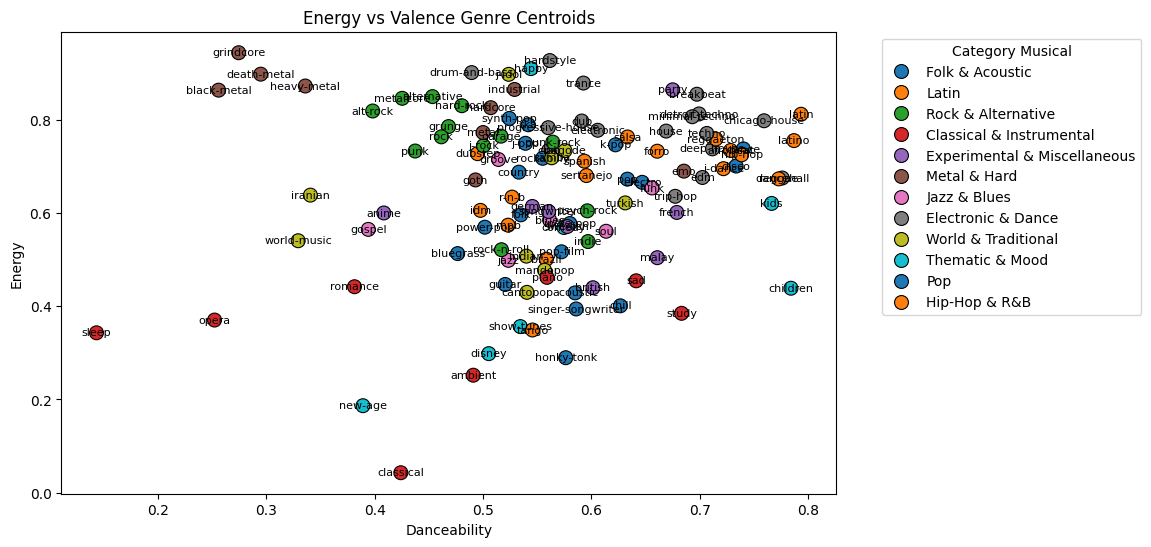

In [52]:
# Calculate the average values per genre
genre_avg = tracklist_short.groupby('track_genre')[['danceability', 'energy']].mean().reset_index()

# Merge with category_mood
genre_avg = genre_avg.merge(tracklist_short[['track_genre', 'category_musical']].drop_duplicates(), on='track_genre')

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=genre_avg, x='danceability', y='energy', hue='category_musical', palette='tab10', s=100, edgecolor='black', ax=ax)

# Annotate the points
for i, row in genre_avg.iterrows():
    ax.text(row['danceability'], row['energy'], row['track_genre'], ha='center', va='center', fontsize=8)

plt.title('Energy vs Valence Genre Centroids')
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.legend(title='Category Musical', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

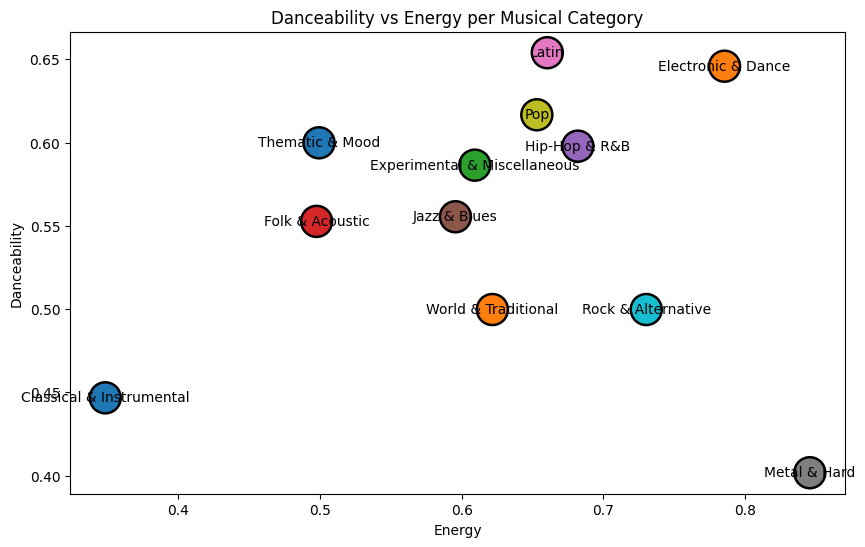

In [54]:
# Calculate the average values of danceability and energy per musical category
category_avg_dance_energy_musical = tracklist_short.groupby('category_musical')[['danceability', 'energy']].mean().reset_index()

# Create the plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=category_avg_dance_energy_musical, x='energy', y='danceability', hue='category_musical', palette='tab10', s=500, edgecolor='black', legend=False, ax=ax)

# Annotate the points
for i, row in category_avg_dance_energy_musical.iterrows():
    ax.text(row['energy'], row['danceability'], row['category_musical'], ha='center', va='center')

plt.title('Danceability vs Energy per Musical Category')
plt.xlabel('Energy')
plt.ylabel('Danceability')
plt.show()

## Energy vs Danceability

## Feature importance valence

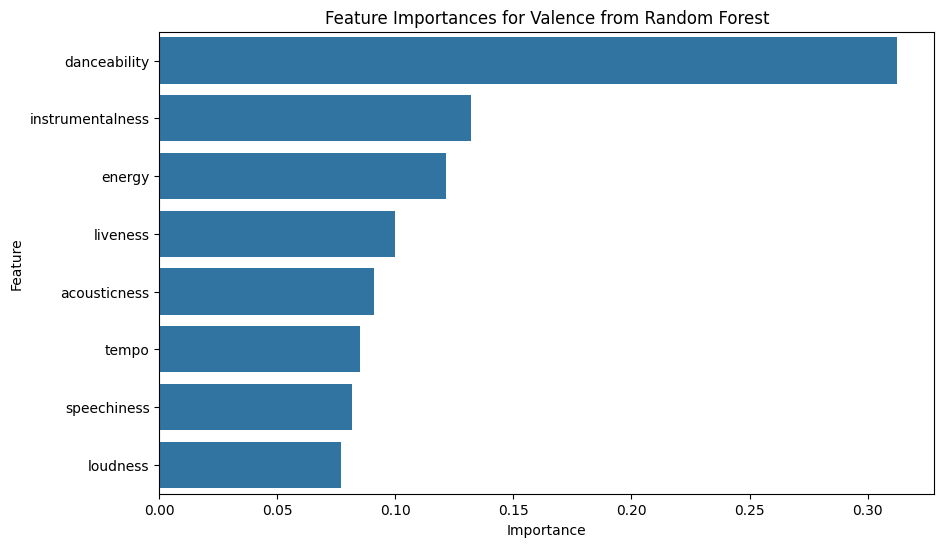

In [55]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Prepare the data
# Select features and target
features = tracklist_short[['danceability', 'energy', 'tempo', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']]
target = tracklist_short['valence']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importances_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances for Valence from Random Forest')
plt.show()

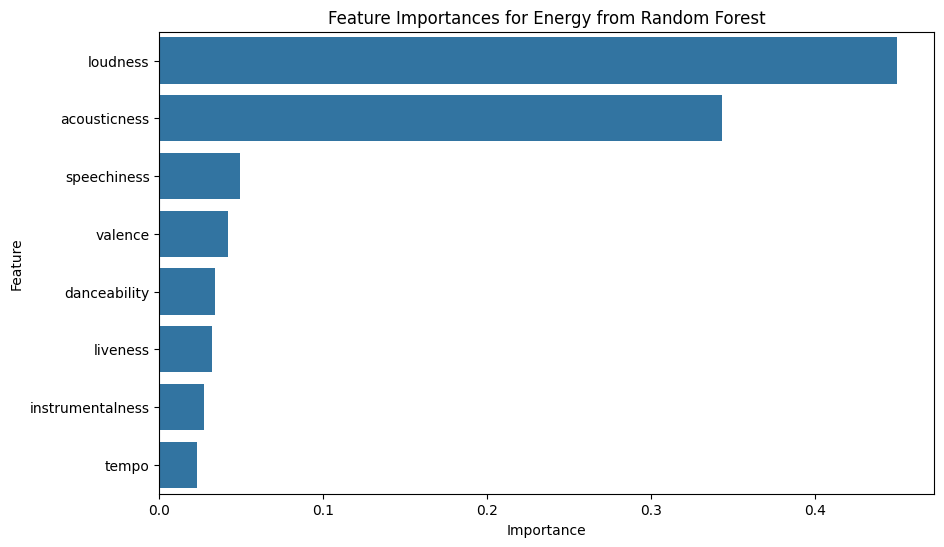

In [56]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Prepare the data
# Select features and target
features = tracklist_short[['danceability', 'valence', 'tempo', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness']]
target = tracklist_short['energy']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame for visualization
feature_importances_df = pd.DataFrame({
    'Feature': features.columns,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances_df)
plt.title('Feature Importances for Energy from Random Forest')
plt.show()